Gabriele Pedroni (ENSIIE - M2DS)

Lorenzo Turchi (ENSIIE - M2QF)

# Classification model for a real application: the Heart dataset
The “SAheart.txt” dataset stored a n = 462 sample of males in a heart-disease high-risk region of the Western Cape,
South Africa. In this section, the aim of the work is studying classification models to be able to predict the value of the “chd” response variable (coronary heart disease), given the other variables (p = 10).

In the next passages, we have imported all the necessaries libraries and extracted the quantitative co-variables (X) and the target response (Y) of this dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#Application SA Heart
tab = pd.read_csv('SAheart.txt')
print(tab)
np.shape(tab)

     row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd  
0      97.20   52    1  
1       2.06   63    1  
2       3.81   46    0  

(462, 11)

These are the covariates in our dataset:
*   sbp: systolic blood pressure
*   tobacco: cumulative tobacco (kg)
*   ldl: low density lipoprotein cholesterol
*   adiposity: not recorded in source; maybe another measurement of obesity similar to BMI.
*   famhist: family history of heart disease (Present, Absent)
*   typea: type-A behavior
*   obesity: A measure of obesity; body mass index (or BMI) is consistent with Rossouw et al. (1983). Having BMI >= 30 scored as "obese" by Rossouw et al. (1983).
*   alcohol: current alcohol consumption
*   age: age at onset
*   chd: coronary heart disease (response variable)



In [3]:
print(tab.columns)

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')


In [4]:
Y=tab["chd"]
Xnum=tab.loc[:,['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']]
X=Xnum.to_numpy()

In this problem, we cannot generate a test set. For this reason, we need to split our dataset into training set and the test set through an arbitrary threshold that will define the proportion of data that will compose the test set. The remaing data will form the training set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

The following step represents the data normalization necessary in order to conduct a meaningful analysis. The key theoretical concept in what we are about to do is that we have to act as if we are in possession only of the training set, so our scaler must be defined according to the data in X_train and then we have to normalize X_test according to the same scaler (which might seem counter intuitive).

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The following classification methods are proved and in the sequent order:
- Naive Bayes
- Linear Discrimination Analysis
- Quadratic Discrimination Analysis
- Logistic Regression
- Decision Tree Classifier
- Bagging
- Random Forest

We decided to not use K-Nearest-Neighbor classifier because as we saw during the lecture (lecture 1, slide 43), the euclidean distance loses its discrimination ability in high dimensional spaces.

## Naive Bayes

### Naive Bayes: model calibration

In [7]:
nb = GaussianNB()
nb_fit = nb.fit(X_train, y_train)

pY_test=nb_fit.predict_proba(X_test)
predxclass=np.argmax(pY_test,axis=1)
print(predxclass)

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1]


### Naive Bayes: evaluation of the model

In [8]:
nb_accuracy = accuracy_score(y_test, predxclass)
nb_precision = precision_score(y_test, predxclass)
nb_recall = recall_score(y_test, predxclass)
nb_f1_score = f1_score(y_test, predxclass)

print(f"Accuracy using NB is: {nb_accuracy:.3f}")
print(f"Precision using NB is: {nb_precision:.3f}")
print(f"Recall using NB is: {nb_recall:.3f}")
print(f"F1-score using NB is: {nb_f1_score:.3f}")

Accuracy using NB is: 0.634
Precision using NB is: 0.459
Recall using NB is: 0.548
F1-score using NB is: 0.500


### Naive Bayes: ROC curve

To have another metric to compare the various classification methods, we think it is useful to visualize the ROC curve and to compute the AUC.

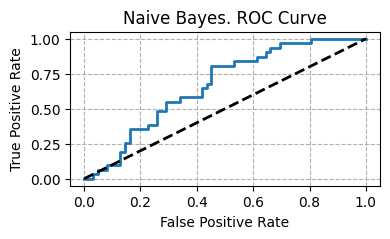

The area under the ROC Curve, using Naive Bayes Classifier is: 0.613


In [9]:
nb_y_prob_1 = pY_test[:, 1]
nb_FPR, nb_TPR, nb_threshold = roc_curve(y_test, nb_y_prob_1)

figure = plt.figure(figsize=(4,2))
plt.plot(nb_FPR, nb_TPR, linewidth=2)
plt.title('Naive Bayes. ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(nb_TPR, nb_TPR, "k--", linewidth = 2)
plt.grid(linestyle='dashed')
plt.show()

nb_y_pred = nb_fit.predict(X_test)
nb_auc_score = roc_auc_score(y_test, nb_y_pred)
print(f"The area under the ROC Curve, using Naive Bayes Classifier is: {nb_auc_score:.3f}")

## Linear Discriminant Analysis

### LDA: model calibration

In [10]:
lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(X_train, y_train)

predxclass = lda.predict(X_test)
pY_test = lda_fit.predict_proba(X_test)

### LDA: evaluation of the model

In [11]:
lda_accuracy = accuracy_score(y_test, predxclass)
lda_precision = precision_score(y_test, predxclass)
lda_recall = recall_score(y_test, predxclass)
lda_f1_score = f1_score(y_test, predxclass)

print(f"Accuracy using LDA is: {lda_accuracy:.3f}")
print(f"Precision using LDA is: {lda_precision:.3f}")
print(f"Recall using LDA is: {lda_recall:.3f}")
print(f"F1-score using LDA is: {lda_f1_score:.3f}")

Accuracy using LDA is: 0.634
Precision using LDA is: 0.448
Recall using LDA is: 0.419
F1-score using LDA is: 0.433


### LDA: ROC curve

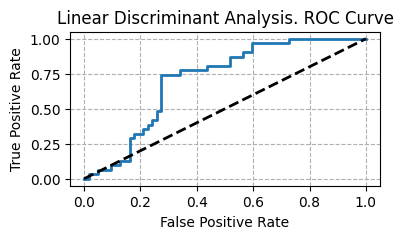

The area under the ROC Curve, using LDA is: 0.581


In [12]:
lda_y_prob_1 = pY_test[:, 1]
lda_FPR, lda_TPR, lda_threshold = roc_curve(y_test, lda_y_prob_1)

figure = plt.figure(figsize=(4,2))
plt.plot(lda_FPR, lda_TPR, linewidth=2)
plt.title('Linear Discriminant Analysis. ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(lda_TPR, lda_TPR, "k--", linewidth = 2)
plt.grid(linestyle='dashed')
plt.show()

lda_y_pred = lda_fit.predict(X_test)
lda_auc_score = roc_auc_score(y_test, lda_y_pred)
print(f"The area under the ROC Curve, using LDA is: {lda_auc_score:.3f}")

## Quadratic Discriminant Analysis

### QDA: model calibration

In [13]:
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(X_train, y_train)

predxclass = qda.predict(X_test)
pY_test = qda_fit.predict_proba(X_test)

### QDA: evaluation of the model

In [14]:
qda_accuracy = accuracy_score(y_test, predxclass)
qda_precision = precision_score(y_test, predxclass)
qda_recall = recall_score(y_test, predxclass)
qda_f1_score = f1_score(y_test, predxclass)

print(f"Accuracy using QDA is: {qda_accuracy:.3f}")
print(f"Precision using QDA is: {qda_precision:.3f}")
print(f"Recall using QDA is: {qda_recall:.3f}")
print(f"F1-score using QDA is: {qda_f1_score:.3f}")

Accuracy using QDA is: 0.645
Precision using QDA is: 0.467
Recall using QDA is: 0.452
F1-score using QDA is: 0.459


### QDA: ROC curve

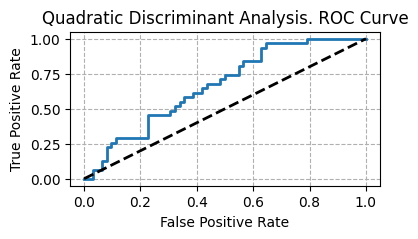

The area under the ROC Curve, using QDA is: 0.597


In [15]:
qda_y_prob_1 = pY_test[:, 1]
qda_FPR, qda_TPR, qda_threshold = roc_curve(y_test, qda_y_prob_1)

figure = plt.figure(figsize=(4,2))
plt.plot(qda_FPR, qda_TPR, linewidth=2)
plt.title('Quadratic Discriminant Analysis. ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(qda_TPR, qda_TPR, "k--", linewidth = 2)
plt.grid(linestyle='dashed')
plt.show()

qda_y_pred = qda_fit.predict(X_test)
qda_auc_score = roc_auc_score(y_test, qda_y_pred)
print(f"The area under the ROC Curve, using QDA is: {qda_auc_score:.3f}")

# Logistic Regression

### Logistic Regression: model calibration

In [16]:
# Creating and fitting the logistic regression model
LR = LogisticRegression()
lr_fit = LR.fit(X_train, y_train)

# Making predictions on the test set
predxclass = LR.predict(X_test)
pY_test = lr_fit.predict_proba(X_test)

### Logistic Regression: evaluation of the model

In [17]:
lr_accuracy = accuracy_score(y_test, predxclass)
lr_precision = precision_score(y_test, predxclass)
lr_recall = recall_score(y_test, predxclass)
lr_f1_score = f1_score(y_test, predxclass)

print(f"Accuracy using LR is: {lr_accuracy:.3f}")
print(f"Precision using LR is: {lr_precision:.3f}")
print(f"Recall using LR is: {lr_recall:.3f}")
print(f"F1-score using LR is: {lr_f1_score:.3f}")

Accuracy using LR is: 0.634
Precision using LR is: 0.448
Recall using LR is: 0.419
F1-score using LR is: 0.433


### Logistic Regression: ROC curve

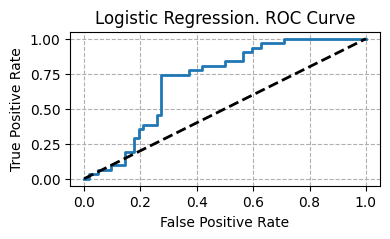

The area under the ROC Curve, using LR is: 0.581


In [18]:
lr_y_prob_1 = pY_test[:, 1]
lr_FPR, lr_TPR, lr_threshold = roc_curve(y_test, lr_y_prob_1)

figure = plt.figure(figsize=(4,2))
plt.plot(lr_FPR, lr_TPR, linewidth=2)
plt.title('Logistic Regression. ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(lr_TPR, lr_TPR, "k--", linewidth = 2)
plt.grid(linestyle='dashed')
plt.show()

lr_y_pred = lr_fit.predict(X_test)
lr_auc_score = roc_auc_score(y_test, lr_y_pred)
print(f"The area under the ROC Curve, using LR is: {lr_auc_score:.3f}")

## Classification Decision Tree

From here on, the pipeline for the evaluation of the model gets more complicated: for Naive Bayes, LDA and QDA, applying the knowledge from the lectures, we reasoned that there were not hyperparameters to estimate via CV.

Sadly, this is not the case for Classification Decision Tree, Bagging and Random Forest: we are going to tune the main hyperparameters via 10-fold CV picking the optimal parameter from a grid of values we deem feasible for this problem, thus from now on we are going to add a section "parameter estimation" to each section.

### Decision Tree: parameter estimation

In [19]:
tree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
max_depth_cv = grid_search.best_params_['max_depth']
print(f"The optimal value for the hyperparameter max depth is: {max_depth_cv}")
min_samples_leaf_cv = grid_search.best_params_['min_samples_leaf']
print(f"The optimal value for the hyperparameter min samples leaf is: {min_samples_leaf_cv}")

The optimal value for the hyperparameter max depth is: 2
The optimal value for the hyperparameter min samples leaf is: 1


### Decision Tree: model calibration

In [20]:
tree = DecisionTreeClassifier(max_depth = max_depth_cv, min_samples_leaf=min_samples_leaf_cv)
treefit = tree.fit(X_train, y_train)

pY_test=treefit.predict_proba(X_test)
predxclass=np.argmax(pY_test,axis=1)
print(predxclass)

[0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1]


### Decision Tree: evaluation of the model / scores

In [21]:
dt_accuracy = accuracy_score(y_test, predxclass)
dt_precision = precision_score(y_test, predxclass)
dt_recall = recall_score(y_test, predxclass)
dt_f1_score = f1_score(y_test, predxclass)
dt_E_test = (y_test != predxclass).sum()/len(y_test)

print(f"Accuracy using Classification DT: {dt_accuracy:.3f}")
print(f"Precision using Classification DT: {dt_precision:.3f}")
print(f"Recall using Classification DT: {dt_recall:.3f}")
print(f"F1-score using Classification DT: {dt_f1_score:.3f}")
print(f"Error in the testing set using Classification DT: {dt_E_test:.3f}")

Accuracy using Classification DT: 0.656
Precision using Classification DT: 0.486
Recall using Classification DT: 0.548
F1-score using Classification DT: 0.515
Error in the testing set using Classification DT: 0.344


Let us explore visually the structure of the tree.

In [22]:
r = export_text(treefit)
print(r)

|--- feature_7 <= 0.53
|   |--- feature_7 <= -0.78
|   |   |--- class: 0
|   |--- feature_7 >  -0.78
|   |   |--- class: 0
|--- feature_7 >  0.53
|   |--- feature_2 <= -1.12
|   |   |--- class: 0
|   |--- feature_2 >  -1.12
|   |   |--- class: 1



For a cleaner visualization

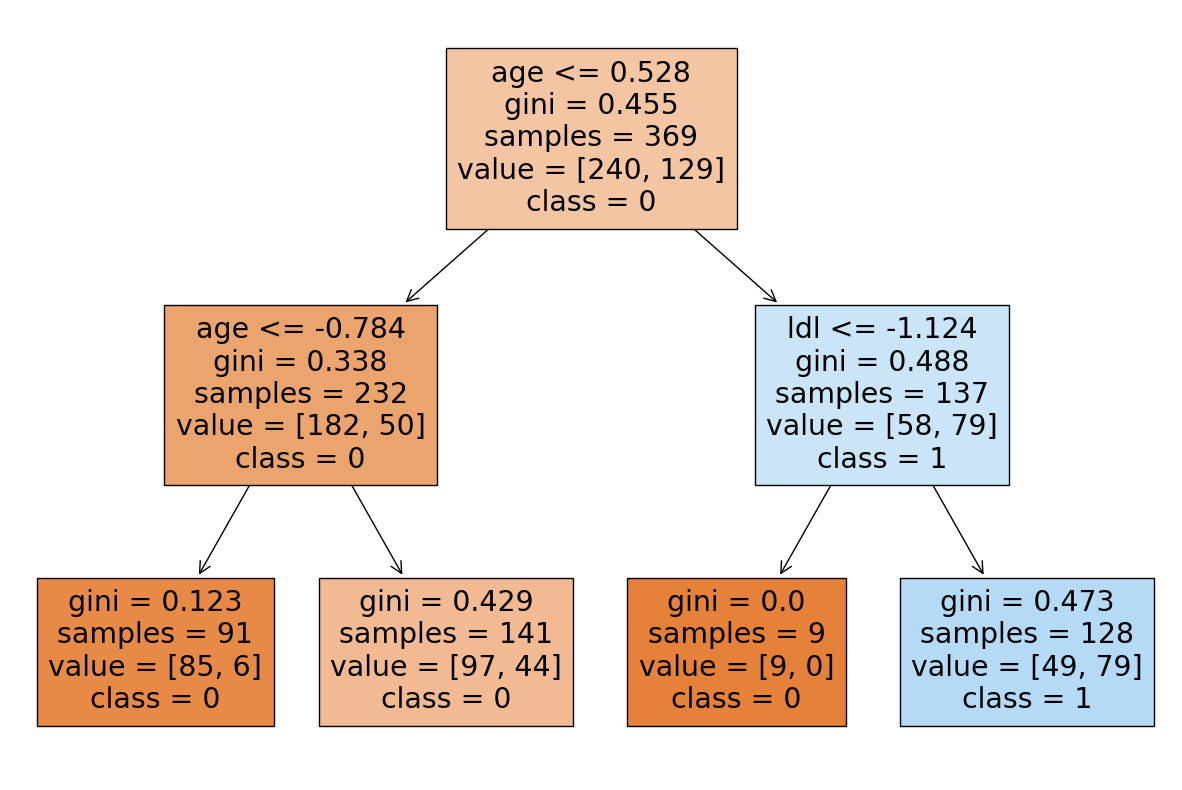

In [23]:
# Retrieve the names of the features
f_names = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
c_names = ['0','1']

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=f_names, class_names=c_names, filled=True)
plt.show()

### Decision Tree: ROC curve

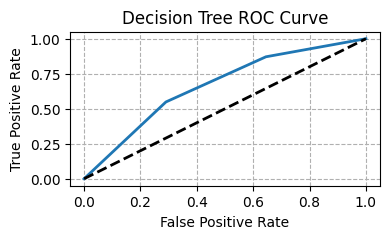

The area under the ROC Curve, using Classification Decision Tree is: 0.629


In [24]:
tree_y_prob_1 = pY_test[:, 1]
tree_FPR, tree_TPR, tree_threshold = roc_curve(y_test, tree_y_prob_1)

figure = plt.figure(figsize=(4,2))
plt.plot(tree_FPR, tree_TPR, linewidth=2)
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(tree_TPR, tree_TPR, "k--", linewidth = 2)
plt.grid(linestyle='dashed')
plt.show()

tree_y_pred = treefit.predict(X_test)
tree_auc_score = roc_auc_score(y_test, tree_y_pred)
print(f"The area under the ROC Curve, using Classification Decision Tree is: {tree_auc_score:.3f}")

## Bagging

### Bagging: parameters estimation

In [25]:
treemod = DecisionTreeClassifier(max_depth=max_depth_cv)

param_grid = {
    'n_estimators':[2, 5,10,25,50],
    'max_samples':[0.8, 1.0],
    'max_features':[0.8, 1.0]
}

#bagmod=BaggingClassifier(base_estimator=treemod, n_estimators=n_estimators_grid, random_state=0)
bagging = BaggingClassifier(estimator=treemod)
grid_search = GridSearchCV(bagging, param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

n_estimators_cv = grid_search.best_params_['n_estimators']
print(f"The optimal value for the hyperparameter n estimators is: {n_estimators_cv}")
max_features_cv = grid_search.best_params_['max_features']
print(f"The optimal value for the hyperparameter max features is: {max_features_cv}")
max_samples_cv = grid_search.best_params_['max_samples']
print(f"The optimal value for the hyperparameter max samples is: {max_samples_cv}")

{'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 10}
The optimal value for the hyperparameter n estimators is: 10
The optimal value for the hyperparameter max features is: 0.8
The optimal value for the hyperparameter max samples is: 1.0


### Bagging: model calibration

In [26]:
bagmod=BaggingClassifier(n_estimators=n_estimators_cv, max_features=max_features_cv, max_samples=max_samples_cv, random_state=0)

treemodfit=treemod.fit(X_train, y_train)
bagmodfit=bagmod.fit(X_train, y_train)
pY_test=bagmodfit.predict_proba(X_test)
predxclass=np.argmax(pY_test,axis=1)

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Bagging: evaluation of the model / scores

In [27]:
bag_accuracy = accuracy_score(y_test, predxclass)
bag_precision = precision_score(y_test, predxclass)
bag_recall = recall_score(y_test, predxclass)
bag_f1_score = f1_score(y_test, predxclass)
bag_E_test = (y_test != predxclass).sum() / len(y_test)

print(f"Accuracy using Bagging is: {bag_accuracy:.3f}")
print(f"Precision using Bagging is: {bag_precision:.3f}")
print(f"Recall using Bagging is: {bag_recall:.3f}")
print(f"F1-score using Bagging is: {bag_f1_score:.3f}")
print(f"Error in the testing set using Bagging: {bag_E_test:.3f}")


Accuracy using Bagging is: 0.710
Precision using Bagging is: 0.611
Recall using Bagging is: 0.355
F1-score using Bagging is: 0.449
Error in the testing set using Bagging: 0.290


### Bagging: ROC curve

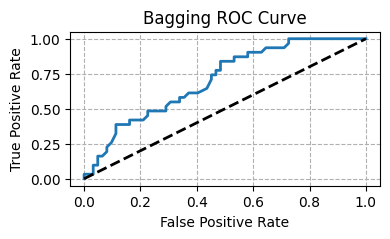

The area under the ROC Curve, using Bagging, is: 0.621


In [28]:
bag_y_prob_1 = bagmodfit.predict_proba(X_test)[:, 1]
bag_FPR, bag_TPR, bag_threshold = roc_curve(y_test, bag_y_prob_1)

figure=plt.figure(figsize=(4,2))
plt.plot(bag_FPR, bag_TPR, linewidth=2)
plt.title('Bagging ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(bag_TPR, bag_TPR, "k--", linewidth=2)
plt.grid(linestyle='dashed')
plt.show()

bag_y_pred = bagmodfit.predict(X_test)
bag_auc_score = roc_auc_score(y_test, bag_y_pred)
print(f"The area under the ROC Curve, using Bagging, is: {bag_auc_score:.3f}")

## Random Forest

### RF: parameters estimation

In [29]:
param_grid = {
    'n_estimators':[50, 100, 200],  
    'max_depth':[3, 5, 7, 10], 
    'min_samples_split':[2, 5],
    'min_samples_leaf':[1, 2]
}
#RF = RandomForestClassifier(max_depth=max_depth_cv, random_state=0, oob_score = True, max_features='sqrt', )
RF = RandomForestClassifier()
grid_search = GridSearchCV(RF, param_grid, cv = 10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

n_estimators_cv = grid_search.best_params_['n_estimators']
print(f"The optimal value for the hyperparameter n estimators is: {n_estimators_cv}")
max_depth_cv = grid_search.best_params_['max_depth']
print(f"The optimal value for the hyperparameter max depth is: {max_depth_cv}")
min_samples_split_cv = grid_search.best_params_['min_samples_split']
print(f"The optimal value for the hyperparameter min samples split is: {min_samples_split_cv}")
min_samples_leaf_cv = grid_search.best_params_['min_samples_leaf']
print(f"The optimal value for the hyperparameter min samples leaf is: {min_samples_leaf_cv}")

The optimal value for the hyperparameter n estimators is: 50
The optimal value for the hyperparameter max depth is: 5
The optimal value for the hyperparameter min samples split is: 2
The optimal value for the hyperparameter min samples leaf is: 2


### RF: model calibration

In [30]:
RF = RandomForestClassifier(max_depth=max_depth_cv, random_state=0, oob_score = True, max_features='sqrt', n_estimators=n_estimators_cv, min_samples_leaf=min_samples_leaf_cv, min_samples_split=min_samples_split_cv)

RFfit = RF.fit(X_train, y_train)
pY_test=RFfit.predict_proba(X_test)
predxclass=np.argmax(pY_test,axis=1)

### RF: evaluation of the model / scores

In [31]:
rf_accuracy = accuracy_score(y_test, predxclass)
rf_precision = precision_score(y_test, predxclass)
rf_recall = recall_score(y_test, predxclass)
rf_f1_score = f1_score(y_test, predxclass)
rf_E_test = (y_test != predxclass).sum() / len(y_test)
OOB=RF.oob_score_

print(f"Accuracy using RF is: {rf_accuracy:.3f}")
print(f"Precision using RF is: {rf_precision:.3f}")
print(f"Recall using RF is: {rf_recall:.3f}")
print(f"F1-score using RF is: {rf_f1_score:.3f}")
print(f"Error in the testing set using RF: {bag_E_test:.3f}")
print(f"The Out Of the Bag error is: {OOB:.3f}")

Accuracy using RF is: 0.667
Precision using RF is: 0.500
Recall using RF is: 0.419
F1-score using RF is: 0.456
Error in the testing set using RF: 0.290
The Out Of the Bag error is: 0.715


### RF: ROC curve

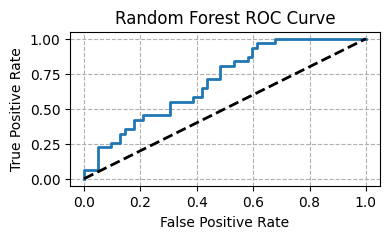

The area under the ROC Curve, using Random Forest, is: 0.605


In [32]:
rf_y_prob_1 = RFfit.predict_proba(X_test)[:, 1]

rf_FPR, rf_TPR, rf_threshold = roc_curve(y_test, rf_y_prob_1)

figure = plt.figure(figsize=(4, 2))
plt.plot(rf_FPR, rf_TPR, linewidth = 2)
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(rf_TPR, rf_TPR, "--k", linewidth=2)
plt.grid(linestyle='dashed')
plt.show()

rf_y_pred = RFfit.predict(X_test)
rf_auc_score = roc_auc_score(y_test, rf_y_pred)
print(f"The area under the ROC Curve, using Random Forest, is: {rf_auc_score:.3f}")

### VIM analysis
Due to the random selection of the features done by the model, only a restricted number of them has been included in the trees. Therefore, the latter may be problematic if there is one (or more) features that reduce heterogeneity in a greater way than the others. Indeed, not including the variable in the tree will create a meaningless tree (or a tree that does not represent much). At the end, we have decided to include a part where we analyze at the VIM to make sure to that it is at least approximatively balanced.

Feature ranking:
1. Feature 7: 0.254
2. Feature 2: 0.180
3. Feature 1: 0.137
4. Feature 3: 0.135
5. Feature 6: 0.081
6. Feature 5: 0.078
7. Feature 4: 0.077
8. Feature 0: 0.059


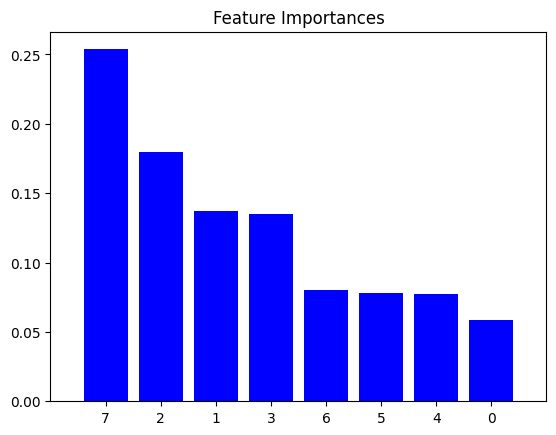

In [33]:
# Retrieve feature importances
importances = RF.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]:.3f}")

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range((X_train.shape[1])), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The VIM looks balanced so Random Forest is used in a proper way.

In [37]:
from sklearn.model_selection import train_test_split

"""accurancy_train_k = np.zeros(k)
precision_train_k = np.zeros(k)
recall_train_k = np.zeros(k)
F1_score_train_k = np.zeros(k)"""

k = 5

nb_accurancy_test_k = np.zeros(k)
nb_precision_test_k = np.zeros(k)
nb_recall_test_k = np.zeros(k)
nb_F1_score_test_k = np.zeros(k)
nb_accurancy_test_k[0] = nb_accuracy
nb_precision_test_k[0] = nb_precision
nb_recall_test_k[0] = nb_recall
nb_F1_score_test_k[0] = nb_f1_score

lda_accurancy_test_k = np.zeros(k)
lda_precision_test_k = np.zeros(k)
lda_recall_test_k = np.zeros(k)
lda_F1_score_test_k = np.zeros(k)
lda_accurancy_test_k[0] = lda_accuracy
lda_precision_test_k[0] = lda_precision
lda_recall_test_k[0] = lda_recall
lda_F1_score_test_k[0] = lda_f1_score

qda_accurancy_test_k = np.zeros(k)
qda_precision_test_k = np.zeros(k)
qda_recall_test_k = np.zeros(k)
qda_F1_score_test_k = np.zeros(k)
qda_accurancy_test_k[0] = qda_accuracy
qda_precision_test_k[0] = qda_precision
qda_recall_test_k[0] = qda_recall
qda_F1_score_test_k[0] = qda_f1_score

lr_accurancy_test_k = np.zeros(k)
lr_precision_test_k = np.zeros(k)
lr_recall_test_k = np.zeros(k)
lr_F1_score_test_k = np.zeros(k)
lr_accurancy_test_k[0] = lr_accuracy
lr_precision_test_k[0] = lr_precision
lr_recall_test_k[0] = lr_recall
lr_F1_score_test_k[0] = lr_f1_score

cdt_accurancy_test_k = np.zeros(k)
cdt_precision_test_k = np.zeros(k)
cdt_recall_test_k = np.zeros(k)
cdt_F1_score_test_k = np.zeros(k)
cdt_accurancy_test_k[0] = dt_accuracy
cdt_precision_test_k[0] = dt_precision
cdt_recall_test_k[0] = dt_recall
cdt_F1_score_test_k[0] = dt_f1_score

bag_accurancy_test_k = np.zeros(k)
bag_precision_test_k = np.zeros(k)
bag_recall_test_k = np.zeros(k)
bag_F1_score_test_k = np.zeros(k)
bag_accurancy_test_k[0] = bag_accuracy
bag_precision_test_k[0] = bag_precision
bag_recall_test_k[0] = bag_recall
bag_F1_score_test_k[0] = bag_f1_score

rf_accurancy_test_k = np.zeros(k)
rf_precision_test_k = np.zeros(k)
rf_recall_test_k = np.zeros(k)
rf_F1_score_test_k = np.zeros(k)
rf_accurancy_test_k[0] = rf_accuracy
rf_precision_test_k[0] = rf_precision
rf_recall_test_k[0] = rf_recall
rf_F1_score_test_k[0] = rf_f1_score

for i in range(1,k):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    nb = GaussianNB()
    nb_fit = nb.fit(X_train, y_train)
    pY_test=nb_fit.predict_proba(X_test)
    predxclass=np.argmax(pY_test,axis=1)
    nb_accurancy_test_k[i] = accuracy_score(y_test, predxclass) #same thing written before
    nb_precision_test_k[i] = precision_score(y_test, predxclass)
    nb_recall_test_k[i] = recall_score(y_test, predxclass)
    nb_F1_score_test_k[i] = f1_score(y_test, predxclass)

    lda = LinearDiscriminantAnalysis()
    lda_fit = lda.fit(X_train, y_train)
    predxclass = lda.predict(X_test)
    lda_accurancy_test_k[i] = accuracy_score(y_test, predxclass) #same thing written before
    lda_precision_test_k[i] = precision_score(y_test, predxclass)
    lda_recall_test_k[i] = recall_score(y_test, predxclass)
    lda_F1_score_test_k[i] = f1_score(y_test, predxclass)

    qda = QuadraticDiscriminantAnalysis()
    qda_fit = qda.fit(X_train, y_train)
    predxclass = qda.predict(X_test)
    qda_accurancy_test_k[i] = accuracy_score(y_test, predxclass) #same thing written before
    qda_precision_test_k[i] = precision_score(y_test, predxclass)
    qda_recall_test_k[i] = recall_score(y_test, predxclass)
    qda_F1_score_test_k[i] = f1_score(y_test, predxclass)

    LR = LogisticRegression()
    lr_fit = LR.fit(X_train, y_train)
    predxclass = LR.predict(X_test)
    lr_accurancy_test_k[i] = accuracy_score(y_test, predxclass) #same thing written before
    lr_precision_test_k[i] = precision_score(y_test, predxclass)
    lr_recall_test_k[i] = recall_score(y_test, predxclass)
    lr_F1_score_test_k[i] = f1_score(y_test, predxclass)

    tree = DecisionTreeClassifier(max_depth = max_depth_cv, min_samples_leaf=min_samples_leaf_cv)
    treefit = tree.fit(X_train, y_train)
    pY_test=treefit.predict_proba(X_test)
    predxclass=np.argmax(pY_test,axis=1)
    cdt_accurancy_test_k[i] = accuracy_score(y_test, predxclass) #same thing written before
    cdt_precision_test_k[i] = precision_score(y_test, predxclass)
    cdt_recall_test_k[i] = recall_score(y_test, predxclass)
    cdt_F1_score_test_k[i] = f1_score(y_test, predxclass)

    bagmod=BaggingClassifier(base_estimator=treemod, n_estimators=n_estimators_cv, max_features=max_features_cv, max_samples=max_samples_cv, random_state=0)
    treemodfit=treemod.fit(X_train, y_train)
    bagmodfit=bagmod.fit(X_train, y_train)
    pY_test=bagmodfit.predict_proba(X_test)
    predxclass=np.argmax(pY_test,axis=1)
    bag_accurancy_test_k[i] = accuracy_score(y_test, predxclass) #same thing written before
    bag_precision_test_k[i] = precision_score(y_test, predxclass)
    bag_recall_test_k[i] = recall_score(y_test, predxclass)
    bag_F1_score_test_k[i] = f1_score(y_test, predxclass)

    RF = RandomForestClassifier(max_depth=max_depth_cv, random_state=0, oob_score = True, max_features='sqrt', n_estimators=n_estimators_cv, min_samples_leaf=min_samples_leaf_cv, min_samples_split=min_samples_split_cv)
    RFfit = RF.fit(X_train, y_train)
    pY_test=RFfit.predict_proba(X_test)
    predxclass=np.argmax(pY_test,axis=1)
    rf_accurancy_test_k[i] = accuracy_score(y_test, predxclass) #same thing written before
    rf_precision_test_k[i] = precision_score(y_test, predxclass)
    rf_recall_test_k[i] = recall_score(y_test, predxclass)
    rf_F1_score_test_k[i] = f1_score(y_test, predxclass)

nb_acc_final = np.mean(nb_accurancy_test_k)
print(f"Accuracy using nb is: {nb_acc_final:.3f}")
nb_prec_final = np.mean(nb_precision_test_k)
print(f"Precision using nb is: {nb_prec_final:.3f}")
nb_rec_final = np.mean(nb_recall_test_k)
print(f"Recall using nb is: {nb_rec_final:.3f}")
nb_F1_final = np.mean(nb_F1_score_test_k)
print(f"F1-score using nb is: {nb_F1_final:.3f}")

print(" ")

lda_acc_final = np.mean(lda_accurancy_test_k)
print(f"Accuracy using lda is: {lda_acc_final:.3f}")
lda_prec_final = np.mean(lda_precision_test_k)
print(f"Precision using lda is: {lda_prec_final:.3f}")
lda_rec_final = np.mean(lda_recall_test_k)
print(f"Recall using lda is: {lda_rec_final:.3f}")
lda_F1_final = np.mean(lda_F1_score_test_k)
print(f"F1-score using lda is: {lda_F1_final:.3f}")

print(" ")

qda_acc_final = np.mean(qda_accurancy_test_k)
print(f"Accuracy using qda is: {qda_acc_final:.3f}")
qda_prec_final = np.mean(qda_precision_test_k)
print(f"Precision using qda is: {qda_prec_final:.3f}")
qda_rec_final = np.mean(qda_recall_test_k)
print(f"Recall using qda is: {qda_rec_final:.3f}")
qda_F1_final = np.mean(qda_F1_score_test_k)
print(f"F1-score using qda is: {qda_F1_final:.3f}")

print(" ")

lr_acc_final = np.mean(lr_accurancy_test_k)
print(f"Accuracy using lr is: {lr_acc_final:.3f}")
lr_prec_final = np.mean(lr_precision_test_k)
print(f"Precision using lr is: {lr_prec_final:.3f}")
lr_rec_final = np.mean(lr_recall_test_k)
print(f"Recall using lr is: {lr_rec_final:.3f}")
lr_F1_final = np.mean(lr_F1_score_test_k)
print(f"F1-score using lr is: {lr_F1_final:.3f}")

print(" ")

cdt_acc_final = np.mean(cdt_accurancy_test_k)
print(f"Accuracy using cdt is: {cdt_acc_final:.3f}")
cdt_prec_final = np.mean(cdt_precision_test_k)
print(f"Precision using cdt is: {cdt_prec_final:.3f}")
cdt_rec_final = np.mean(cdt_recall_test_k)
print(f"Recall using cdt is: {cdt_rec_final:.3f}")
cdt_F1_final = np.mean(cdt_F1_score_test_k)
print(f"F1-score using cdt is: {cdt_F1_final:.3f}")

print(" ")

bag_acc_final = np.mean(bag_accurancy_test_k)
print(f"Accuracy using bag is: {bag_acc_final:.3f}")
bag_prec_final = np.mean(bag_precision_test_k)
print(f"Precision using bag is: {bag_prec_final:.3f}")
bag_rec_final = np.mean(bag_recall_test_k)
print(f"Recall using bag is: {bag_rec_final:.3f}")
bag_F1_final = np.mean(bag_F1_score_test_k)
print(f"F1-score using bag is: {bag_F1_final:.3f}")

print(" ")

rf_acc_final = np.mean(rf_accurancy_test_k)
print(f"Accuracy using rf is: {rf_acc_final:.3f}")
rf_prec_final = np.mean(rf_precision_test_k)
print(f"Precision using rf is: {rf_prec_final:.3f}")
rf_rec_final = np.mean(rf_recall_test_k)
print(f"Recall using rf is: {rf_rec_final:.3f}")
rf_F1_final = np.mean(rf_F1_score_test_k)
print(f"F1-score using rf is: {rf_F1_final:.3f}")

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

Accuracy using nb is: 0.665
Precision using nb is: 0.505
Recall using nb is: 0.567
F1-score using nb is: 0.533
 
Accuracy using lda is: 0.686
Precision using lda is: 0.538
Recall using lda is: 0.469
F1-score using lda is: 0.499
 
Accuracy using qda is: 0.677
Precision using qda is: 0.526
Recall using qda is: 0.464
F1-score using qda is: 0.492
 
Accuracy using lr is: 0.682
Precision using lr is: 0.531
Recall using lr is: 0.463
F1-score using lr is: 0.491
 
Accuracy using cdt is: 0.662
Precision using cdt is: 0.499
Recall using cdt is: 0.488
F1-score using cdt is: 0.490
 
Accuracy using bag is: 0.701
Precision using bag is: 0.591
Recall using bag is: 0.381
F1-score using bag is: 0.458
 
Accuracy using rf is: 0.680
Precision using rf is: 0.532
Recall using rf is: 0.419
F1-score using rf is: 0.466


## Conclusion

To have a cleaner delivery of what we did, in this notebook we ran the computation first with a single splitting of the dataset, and then in the section "K-fold cross validation" (to have more robust conclusion) we have tried different splitting of the dataset and then for each model we computed the average of the scores (accuracy, precision, recall, F1-score) to help us draw our conclusions.

This is a classical k-fold cross validation procedure, and to have a summary of the results we transfered all the values on an excel sheet. The values displayed in the excel sheet are not going to be the same as the ones someone can get by running this notebook (the splitting is random). Anyways they represent an example of output from this project.

Before getting to our results, we wish to clarify what are the criteria that we are going to use to decide which model is better. Since this is a clinical dataset, talking about a healthcare problem, we think that is more appropriate to penalize the presence of false negatives, because the biggest threat is classifying as healthy a patient that is in fact at risk. 

Thus, we take into account all the indexes but we are going to focus particularly on recall, that is given by the formula $\frac{TP}{TP+FN}$ which means that the more false negative discoveries we find, the lower the values of recall is. 

![Sample table of our results](tabexcl.png)

From our results, we can say that the simpler model tend to have more predictive power on the SAheart dataset; whereas LDA and QDA have a higher accuracy than the rest, Naive Bayes is the method that manages to keep a high recall without necessarily lacking accuracy (only 0.02 less than the discriminant analysis methods).

If we had to choose between Classification Decision Tree, Bagging and Random Forest, we would pick the first one: all the metrics are clearly superior to the other methods (also computationally less expensive). Thus we deduce that this dataset tends to reward simpler methods. Also, it is worth noting that in the instances where RF had particularly low predictive power, the VIM on the training set was more unbalanced (this fact is coherent with the theory).